In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import root_mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv("finaldata.csv")

In [3]:
df.head()

,Date,vixPrice,vixChange%,niftyPrice,niftyChange %,n5day,n10day,n20day,n1day,n60day,...,RbiinterestAnticepation,USInflation Rate (%),USInflationRate%chng,USInflation Rate (%)Anticepation,IndiaInflationRate(%),IndiaInflationRate(%)chng,IndiaInflationRate(%)Anticepation,IndiaBudgetDatesAnticipation,IndiaElectionDatesAnticipation,UsElectionDatesAnticipation
0,2008-06-05,30.32,1.68,4676.95,1.99,4835.3,5025.45,5135.50,4647.00,4864.25,...,0,9.0,4.651163,0,11.8,26.88172,0,0,0,0
1,2008-06-06,30.32,0.00,4627.80,-1.05,4870.1,4946.55,5081.70,4761.20,4921.40,...,0,9.0,4.651163,0,11.8,26.88172,0,1,1,1
2,2008-06-09,32.43,6.96,4500.95,-2.74,4739.6,4875.05,4982.60,4709.65,4771.60,...,0,9.0,4.651163,0,11.8,26.88172,0,2,2,2
3,2008-06-10,30.23,-6.78,4449.80,-1.14,4715.9,4859.80,5012.65,4747.05,4800.40,...,0,9.0,4.651163,0,11.8,26.88172,0,3,3,3
4,2008-06-11,29.64,-1.95,4523.60,1.66,4585.6,4918.35,4957.80,4733.00,4865.90,...,0,9.0,4.651163,0,11.8,26.88172,0,4,4,4


basicaly around 243 rows will denote a year's data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4016 entries, 0 to 4015
Data columns (total 80 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Date                               4016 non-null   object 
 1   vixPrice                           4016 non-null   float64
 2   vixChange%                         4016 non-null   float64
 3   niftyPrice                         4016 non-null   float64
 4   niftyChange %                      4016 non-null   float64
 5   n5day                              4016 non-null   float64
 6   n10day                             4016 non-null   float64
 7   n20day                             4016 non-null   float64
 8   n1day                              4016 non-null   float64
 9   n60day                             4016 non-null   float64
 10  nc5day                             4016 non-null   float64
 11  nc10day                            4016 non-null   float

In [5]:
df.iloc[141:385]

,Date,vixPrice,vixChange%,niftyPrice,niftyChange %,n5day,n10day,n20day,n1day,n60day,...,RbiinterestAnticepation,USInflation Rate (%),USInflationRate%chng,USInflation Rate (%)Anticepation,IndiaInflationRate(%),IndiaInflationRate(%)chng,IndiaInflationRate(%)Anticepation,IndiaBudgetDatesAnticipation,IndiaElectionDatesAnticipation,UsElectionDatesAnticipation
141,2009-01-01,41.34,-4.06,3033.45,2.51,2916.85,2954.35,2657.80,2885.60,3921.20,...,16,4.7,-28.787879,0,9.7,0.000000,21,141,141,38
142,2009-01-02,40.67,-1.62,3046.75,0.44,2857.25,3060.75,2656.45,3043.85,3950.75,...,17,4.7,-28.787879,1,9.7,0.000000,22,142,142,39
143,2009-01-05,38.60,-5.09,3121.45,2.45,2922.20,3077.50,2788.00,3142.10,3818.30,...,0,4.7,-28.787879,2,9.7,0.000000,23,143,143,40
144,2009-01-06,38.73,0.34,3112.80,-0.28,2979.50,3039.30,2714.40,2994.95,3602.35,...,1,4.7,-28.787879,3,9.7,0.000000,24,144,144,41
145,2009-01-07,44.36,14.54,2920.40,-6.18,2959.15,2968.65,2784.00,2892.65,3606.60,...,2,4.7,-28.787879,4,9.7,0.000000,25,145,145,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,2009-12-24,22.69,-4.82,5178.40,0.66,5041.75,5134.65,5005.55,4826.15,4958.95,...,170,2.4,71.428571,17,13.6,20.353982,17,380,173,277
381,2009-12-29,24.41,7.58,5187.95,0.18,4987.70,5117.30,4941.75,4750.55,5006.85,...,171,2.4,71.428571,18,13.6,20.353982,18,381,174,278
382,2009-12-30,24.62,0.86,5169.45,-0.36,4952.60,5105.70,5032.70,4711.70,5083.95,...,172,2.4,71.428571,19,13.6,20.353982,19,382,175,279
383,2009-12-31,23.34,-5.20,5201.05,0.61,4985.85,5033.05,5122.00,4563.90,5083.40,...,173,2.4,71.428571,20,13.6,20.353982,20,383,176,280


In [6]:
df = df['niftyPrice']

In [7]:
year = 243
quarter = (year/3).__int__()
month = (year/12).__int__()
week = (year/52).__int__()

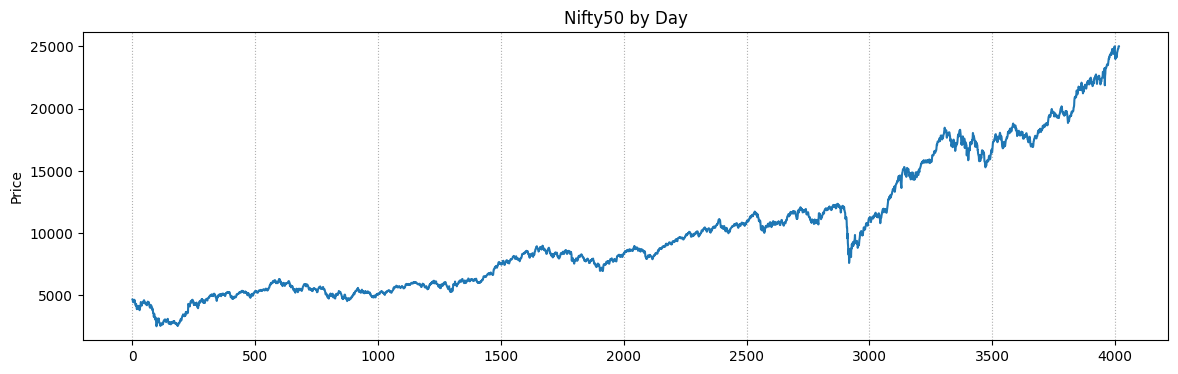

In [8]:
df.plot(figsize=(14, 4), title="Nifty50 by Day", ylabel="Price")
plt.grid(axis="x", ls=":")

In [9]:
result = seasonal_decompose(df, model='additive', period=quarter)

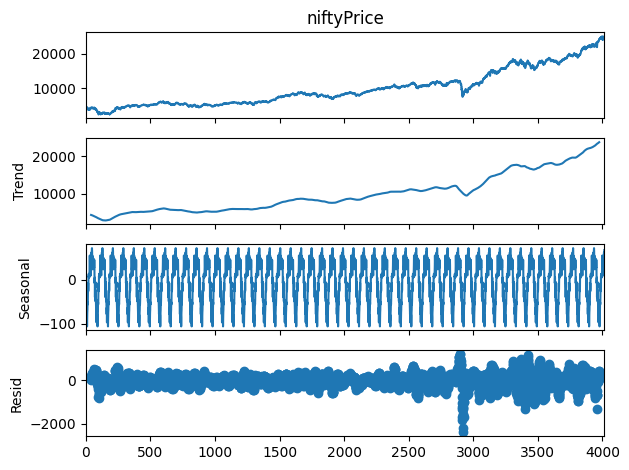

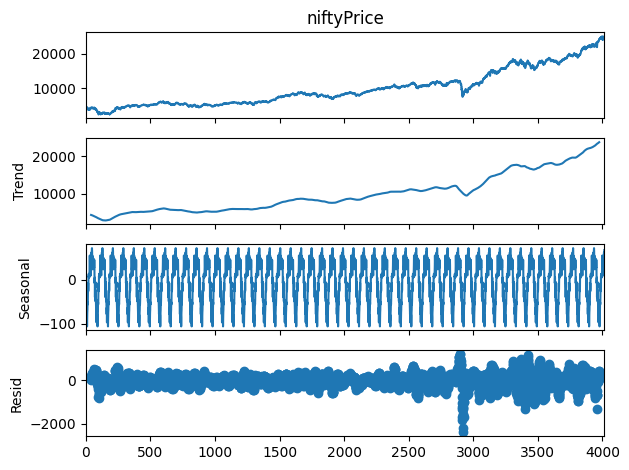

In [10]:
result.plot()

In [11]:
inputval = 20
epoch = 30

In [12]:
train = df.iloc[:len(df)-inputval]
test = df.iloc[len(df)-inputval:]

In [13]:
train

0        4676.95
1        4627.80
2        4500.95
3        4449.80
4        4523.60
          ...   
3991    24479.05
3992    24413.50
3993    24406.10
3994    24834.85
3995    24836.10
Name: niftyPrice, Length: 3996, dtype: float64

In [14]:
test

3996    24857.30
3997    24951.15
3998    25010.90
3999    24717.70
4000    24055.60
4001    23992.55
4002    24297.50
4003    24117.00
4004    24367.50
4005    24347.00
4006    24139.00
4007    24143.75
4008    24541.15
4009    24572.65
4010    24698.85
4011    24770.20
4012    24811.50
4013    24823.15
4014    25010.60
4015    25017.75
Name: niftyPrice, dtype: float64

In [15]:
train.min(), train.max()

(2524.2, 24836.1)

In [16]:
scaler = MinMaxScaler()

In [17]:
train = train.values.reshape(-1, 1)
test = test.values.reshape(-1, 1)

In [18]:
scaler.fit(train)

MinMaxScaler()

In [19]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [20]:
scaled_train

array([[0.09648439],
       [0.09428153],
       [0.08859622],
       ...,
       [0.98072777],
       [0.99994398],
       [1.        ]])

In [21]:
scaled_test

array([[1.00095017],
       [1.00515644],
       [1.00783438],
       [0.99469341],
       [0.96501867],
       [0.96219282],
       [0.97586042],
       [0.96777056],
       [0.97899775],
       [0.97807896],
       [0.96875658],
       [0.96896947],
       [0.9867806 ],
       [0.9881924 ],
       [0.99384857],
       [0.99704642],
       [0.99889745],
       [0.99941959],
       [1.00782094],
       [1.0081414 ]])

In [22]:
generator = TimeseriesGenerator(scaled_train, scaled_train, length=inputval, batch_size=5)

In [23]:
inp, out = generator[0]

In [24]:
inp

array([[[0.09648439],
        [0.09428153],
        [0.08859622],
        [0.08630372],
        [0.08961137],
        [0.09031727],
        [0.08932005],
        [0.09180303],
        [0.09541097],
        [0.09224674],
        [0.08874412],
        [0.08172097],
        [0.07808389],
        [0.07470901],
        [0.07746763],
        [0.0803002 ],
        [0.07226861],
        [0.06796149],
        [0.0615165 ],
        [0.07032794]],

       [[0.09428153],
        [0.08859622],
        [0.08630372],
        [0.08961137],
        [0.09031727],
        [0.08932005],
        [0.09180303],
        [0.09541097],
        [0.09224674],
        [0.08874412],
        [0.08172097],
        [0.07808389],
        [0.07470901],
        [0.07746763],
        [0.0803002 ],
        [0.07226861],
        [0.06796149],
        [0.0615165 ],
        [0.07032794],
        [0.06281626]],

       [[0.08859622],
        [0.08630372],
        [0.08961137],
        [0.09031727],
        [0.08932005],
      

In [25]:
out

array([[0.06281626],
       [0.06686118],
       [0.06748865],
       [0.0656309 ],
       [0.07318516]])

In [26]:
inp2, out2 = generator[1]

In [27]:
inp2

array([[[0.09031727],
        [0.08932005],
        [0.09180303],
        [0.09541097],
        [0.09224674],
        [0.08874412],
        [0.08172097],
        [0.07808389],
        [0.07470901],
        [0.07746763],
        [0.0803002 ],
        [0.07226861],
        [0.06796149],
        [0.0615165 ],
        [0.07032794],
        [0.06281626],
        [0.06686118],
        [0.06748865],
        [0.0656309 ],
        [0.07318516]],

       [[0.08932005],
        [0.09180303],
        [0.09541097],
        [0.09224674],
        [0.08874412],
        [0.08172097],
        [0.07808389],
        [0.07470901],
        [0.07746763],
        [0.0803002 ],
        [0.07226861],
        [0.06796149],
        [0.0615165 ],
        [0.07032794],
        [0.06281626],
        [0.06686118],
        [0.06748865],
        [0.0656309 ],
        [0.07318516],
        [0.07341374]],

       [[0.09180303],
        [0.09541097],
        [0.09224674],
        [0.08874412],
        [0.08172097],
      

In [28]:
out2

array([[0.07341374],
       [0.06834021],
       [0.0679234 ],
       [0.0599187 ],
       [0.05792873]])

In [29]:
inp.shape

(5, 20, 1)

In [30]:
out.shape

(5, 1)

In [31]:
model = Sequential([
    LSTM(1000, activation="relu", input_shape=((inputval, 1))),
    Dense(1)
])

c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [32]:
model.compile(optimizer="adam", loss="mse")

In [33]:
model.fit(generator, epochs=epoch)

Epoch 1/30


c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


796/796 ━━━━━━━━━━━━━━━━━━━━ 124s 155ms/step - loss: 0.0062
Epoch 2/30
796/796 ━━━━━━━━━━━━━━━━━━━━ 121s 152ms/step - loss: 0.0020
Epoch 3/30
796/796 ━━━━━━━━━━━━━━━━━━━━ 122s 153ms/step - loss: 4.6515e-04
Epoch 4/30
796/796 ━━━━━━━━━━━━━━━━━━━━ 116s 145ms/step - loss: 2.9728e-04
Epoch 5/30
796/796 ━━━━━━━━━━━━━━━━━━━━ 113s 142ms/step - loss: 3.4948e-04
Epoch 6/30
796/796 ━━━━━━━━━━━━━━━━━━━━ 114s 144ms/step - loss: 3.4014e-04
Epoch 7/30
796/796 ━━━━━━━━━━━━━━━━━━━━ 120s 150ms/step - loss: 1.1447e-04
Epoch 8/30
796/796 ━━━━━━━━━━━━━━━━━━━━ 117s 147ms/step - loss: 2.3195e-04
Epoch 9/30
796/796 ━━━━━━━━━━━━━━━━━━━━ 117s 147ms/step - loss: 1.0812e-04
Epoch 10/30
796/796 ━━━━━━━━━━━━━━━━━━━━ 123s 154ms/step - loss: 6.4607e-05
Epoch 11/30
796/796 ━━━━━━━━━━━━━━━━━━━━ 120s 151ms/step - loss: 1.0116e-04
Epoch 12/30
796/796 ━━━━━━━━━━━━━━━━━━━━ 122s 153ms/step - loss: 7.5332e-05
Epoch 13/30
796/796 ━━━━━━━━━━━━━━━━━━━━ 119s 150ms/step - loss: 8.7005e-05
Epoch 14/30
796/796 ━━━━━━━━━━━━━━━━━━━━

In [34]:
last_train_batch = scaled_train[-inputval:]
last_train_batch

array([[0.9688888 ],
       [0.96807757],
       [0.9753674 ],
       [0.97606882],
       [0.9770414 ],
       [0.9768935 ],
       [0.98194237],
       [0.97706829],
       [0.97668733],
       [0.98503265],
       [0.98882211],
       [0.99000085],
       [0.99842013],
       [0.9863212 ],
       [0.98535087],
       [0.98399733],
       [0.98105943],
       [0.98072777],
       [0.99994398],
       [1.        ]])

In [35]:
last_train_batch = last_train_batch.reshape((1, inputval, 1))

In [36]:
last_train_batch

array([[[0.9688888 ],
        [0.96807757],
        [0.9753674 ],
        [0.97606882],
        [0.9770414 ],
        [0.9768935 ],
        [0.98194237],
        [0.97706829],
        [0.97668733],
        [0.98503265],
        [0.98882211],
        [0.99000085],
        [0.99842013],
        [0.9863212 ],
        [0.98535087],
        [0.98399733],
        [0.98105943],
        [0.98072777],
        [0.99994398],
        [1.        ]]])

In [37]:
model.predict(last_train_batch)[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


array([1.0039164], dtype=float32)

In [38]:
scaled_test[0]

array([1.00095017])

In [39]:
test_pred = []

In [40]:
first_eval_batch = scaled_train[-inputval:]
current_batch = first_eval_batch.reshape((1, inputval, 1))

In [41]:
for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]

    test_pred.append(current_pred)

    current_batch = np.append(current_batch[:, 1:, :,], [[current_pred]], axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [42]:
test_pred

[array([1.0039164], dtype=float32),
 array([1.0088456], dtype=float32),
 array([1.0136362], dtype=float32),
 array([1.0184687], dtype=float32),
 array([1.0233469], dtype=float32),
 array([1.0282738], dtype=float32),
 array([1.0332543], dtype=float32),
 array([1.0382959], dtype=float32),
 array([1.0434078], dtype=float32),
 array([1.0485985], dtype=float32),
 array([1.0538698], dtype=float32),
 array([1.0592253], dtype=float32),
 array([1.0646695], dtype=float32),
 array([1.0702022], dtype=float32),
 array([1.0758332], dtype=float32),
 array([1.0815648], dtype=float32),
 array([1.0873983], dtype=float32),
 array([1.0933392], dtype=float32),
 array([1.0994036], dtype=float32),
 array([1.1055903], dtype=float32)]

In [43]:
test

array([[24857.3 ],
       [24951.15],
       [25010.9 ],
       [24717.7 ],
       [24055.6 ],
       [23992.55],
       [24297.5 ],
       [24117.  ],
       [24367.5 ],
       [24347.  ],
       [24139.  ],
       [24143.75],
       [24541.15],
       [24572.65],
       [24698.85],
       [24770.2 ],
       [24811.5 ],
       [24823.15],
       [25010.6 ],
       [25017.75]])

In [44]:
true_pred = scaler.inverse_transform(test_pred)

In [45]:
true_pred

array([[24923.48194116],
       [25033.46142204],
       [25140.35023187],
       [25248.17262651],
       [25357.01371908],
       [25466.94266403],
       [25578.06585277],
       [25690.55351161],
       [25804.61044403],
       [25920.42549484],
       [26038.03856081],
       [26157.52943552],
       [26278.99919082],
       [26402.44516693],
       [26528.0828065 ],
       [26655.96530524],
       [26786.1219208 ],
       [26918.67500331],
       [27053.98362386],
       [27192.02118459]])

In [46]:
true_pred

array([[24923.48194116],
       [25033.46142204],
       [25140.35023187],
       [25248.17262651],
       [25357.01371908],
       [25466.94266403],
       [25578.06585277],
       [25690.55351161],
       [25804.61044403],
       [25920.42549484],
       [26038.03856081],
       [26157.52943552],
       [26278.99919082],
       [26402.44516693],
       [26528.0828065 ],
       [26655.96530524],
       [26786.1219208 ],
       [26918.67500331],
       [27053.98362386],
       [27192.02118459]])

In [47]:
test = pd.DataFrame(test)  # Convert test Series to DataFrame
test["Prediction"] = true_pred

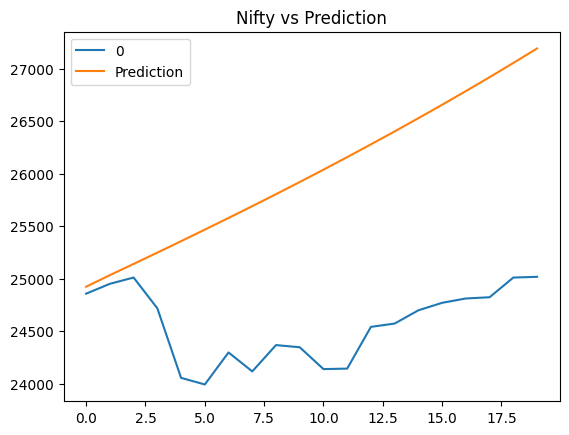

In [48]:
test.plot(title="Nifty vs Prediction")
plt.show()

In [49]:
rmse = root_mean_squared_error(test[0], test["Prediction"]) # Changed test["Production"] to test[0]
rmse

1596.2308139332706

In [50]:
lower = test[0].mean() - rmse
upper = test["Prediction"].mean() + rmse

In [51]:
lower, upper

(22965.909186066732, 27604.977819249885)